## 뉴스 토크나이즈
- 이예빈
- 참고: 
    - 불용어 리스트 (https://www.ranks.nl/stopwords/korean)
    - 불용어 리스트(https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a)

In [1]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tqdm

In [2]:
try:
    if not(os.path.isdir('../../data/tokenized_news')):
        os.makedirs(os.path.join('./tokenized_news'))
                    
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!")
        raise

In [2]:
# CSV_List로 만드는 함수
def csv2list(filename):
    lists = []
    file = open(filename,'r',encoding='utf-8')
    while True:
        line = file.readline().rstrip('\n')
        if line:
            lists.append(line)
        else:
            break
    return lists

In [3]:
stop_words = csv2list('../../data/stop_words/stop_words.csv')

In [4]:
stop_words.append(['무단', '배포', '금지', '기사', '기자'])

In [5]:
### 뉴스 제목에서 기호 제거 & 명사 추출 

def textile_preprocessing(text, okt):
    textile_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣA-z\\s]', ' ', text)
    word_textile = okt.nouns(textile_text) 
    word_textile = [word for word in word_textile if not word in stop_words] # 불용어 제거
    
    return word_textile

In [11]:
### 전처리된 데이터프레임 by_day를 반환합니다. 
## file: csv파일이 들어있는 경로를 지정해주세요. (+ 파일까지 포함되도록!)

def all_preprocessing(file):
    df_file = pd.read_csv(file, encoding='utf-8')
    
#     textile = df_file['text']
#     date_ = df_file['date']
#     df = pd.DataFrame({'text':textile, 'date':date_})
    
    okt = Okt()
    clean_text = []
    for text in df_file['title']:
        if type(text)==str:
            clean_text.append(textile_preprocessing(text, okt))
        else:
            clean_text.append([])
    df_file['title'] = clean_text
    
    # date 컬럼 -> datetime으로 설정 
    df_file['date'] = pd.to_datetime(df_file['date'])
    by_day = df_file
#     by_day = df_file.groupby(df_file['date']).sum()

    # 딕셔너리 풀기
    title_textile = []
    for i in range(len(by_day['title'])):
        title_textile.append(', '.join(by_day['title'][i]))

    by_day['title'] = title_textile
    
    by_day.to_csv('../../data/press/donga_title',encoding='utf-8')
    
    return by_day

In [12]:
all_preprocessing('../../data/news_by_press(2020-01-01~2020-08-31)/동아일보')

,Unnamed: 0,title,text,url,media,date
0,11,"공무원, 증, 밥값, 결제, 혁신, 준, 정부",[2020 新목민심서-공직사회 뿌리부터 바꾸자]\n혁신안 내랬더니 민원사항 내… 부...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-01-01
1,12,"나은, 준비, 민주, 열망, 시대, 동력",역사의 변화는 언제나 청년들이 주도했다. 세상을 올곧게 바꾸려는 ‘청년 정신’이길을...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-01-01
2,13,"조국, 최강, 욱, 명의, 아들, 인턴, 증명, 위조","檢, 조국 기소하며 공소장에 명시… 뇌물 등 11개 혐의… 崔, 조사 불응\n대통령...",https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-01-01
3,14,"창간, 주년, 기획",1. 100주년맞이 ‘한국의 상(床)’\n\n \n동아미디어센터 1층 로비에 마련된...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-01-01
4,15,"미래, 순백, 평원, 이야기",[더 나은 100년을 준비합니다]\n새해 동아 아트 1탄 ‘한국의 床’… 브랜드 쇼...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-01-01
...,...,...,...,...,...,...
3311,28930,"소상, 공인, 금융, 지원, 소진, 불과",신종 코로나바이러스 감염증(코로나19) 사태의 실물경제 충격을 완화하기 위한 금융지...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-31
3312,28931,"정부, 식당, 카페, 학원, 맞춤, 지원, 마련",정부가 소상공인과 취약계층을 위한 맞춤형 경기 보완 대책을 이르면 다음 달 초 내놓...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-31
3313,28932,"이낙연, 취임, 당직, 인선, 착수",더불어민주당의 새 수장이 된 이낙연 대표가 취임 다음 날부터 당직 인선에 착수하고 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-31
3314,28933,"이낙연, 격리, 기간, 대통령, 생각",“부끄럽지만 문재인 대통령 생각이 제일 많이 났다.”\n\n 더불어민주당 이낙연 신...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-31


In [25]:
### 전처리된 데이터프레임 by_day를 반환합니다. 
## file: csv파일이 들어있는 경로를 지정해주세요. (+ 파일까지 포함되도록!)

def all_preprocessing_text(file):
    df_file = pd.read_csv(file, encoding='utf-8')
    
#     textile = df_file['text']
#     date_ = df_file['date']
#     df = pd.DataFrame({'text':textile, 'date':date_})
    
    okt = Okt()
    clean_text = []
    for text in df_file['text']:
        if type(text)==str:
            clean_text.append(textile_preprocessing(text, okt))
        else:
            clean_text.append([])
    df_file['text'] = clean_text
    
    # date 컬럼 -> datetime으로 설정 
    df_file['date'] = pd.to_datetime(df_file['date'])
    by_day = df_file
#     by_day = df_file.groupby(df_file['date']).sum()

    # 딕셔너리 풀기
    title_textile = []
    for i in range(len(by_day['text'])):
        title_textile.append(', '.join(by_day['text'][i]))

    by_day['text'] = title_textile
    
    by_day.to_csv('../../data/press/hanguk_text', encoding='utf-8')
    
    return by_day

In [26]:
all_preprocessing_text('../../data/news_by_press(2020-01-01~2020-08-31)/한국일보')

,Unnamed: 0,title,text,url,media,date
0,75,"[적대사회, 신음하는 지구촌] “훔칠 것도 없어” 강도마저 떠나는 베네수엘라… 국민...","국민, 베네수엘라, 마피아, 보유, 현금, 축소, 신고, 경제, 범죄, 공무원, 군...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01
1,76,"[한국일보 1면 사진] 적대사회, 이미 닥친 디스토피아 (1월 1일자)","지난달, 베네수엘라, 수도, 카라카스, 중심지, 볼리바르, 광장, 인근, 관공서, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01
2,77,총선 4개월 앞… 야당심판론이 정권심판론 앞섰다,"한국, 리서치, 여론조사, 실시, 총선, 민심, 정권, 심판, 야당, 심판, 기운,...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01
3,78,"2019년 한자, 20대 ‘이룰 성(成)’ 30대 ‘위태할 위(危)’… 40대 이상은?","년를, 상징, 한자, 대가, 선택, 반면, 부정, 의미, 내포, 위태, 란, 손, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01
4,79,[알립니다] 2020 한국일보 신춘문예 당선자 선정,"한국, 신춘문예, 부문, 당선자, 선정, 한국, 문학, 미래, 작가, 탄생, 축하,...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01
...,...,...,...,...,...,...
3068,29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'","직장인, 수도권, 사회, 거리, 두기, 단계, 시행, 일간, 무급, 휴가, 사용, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
3069,29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"서울, 전역, 강화, 사회, 거리, 두기, 단계, 시행, 전문가, 방역, 효과, 의...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
3070,29038,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,"수도권, 사회, 거리, 두기, 단계, 시행, 기간, 서울, 시내버스, 야간, 운행,...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
3071,29039,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,"무기한, 집단, 어가, 전공, 인턴, 레지던트, 정부, 갈등, 벼랑, 의협, 의회,...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31


In [ ]:
tmp_df.to_csv('./tokenized_news/tokenized_title_okt_nouns', encoding='utf-8')

In [32]:
aa = pd.read_csv('./1-8월 뉴스.csv')

In [ ]:
okt = Okt()
clean_text = []
for text in aa['text']:
    if type(text)==str:
        
        textile_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', text)
        word_textile = okt.nouns(textile_text) 
        word_textile = [word for word in word_textile if not word in stop_words] # 불용어 제거
        
        clean_text.append(word_textile)
    else:
         clean_text.append([])
    
aa['text'] = clean_text

In [19]:
def daily_news_text_wordcloud(date_to_search):
    tmp_df = pd.read_csv('../../data/tokenized_news/tokenized_news_kyunghang_text', encoding='UTF-8')
    
    cloud = WordCloud(
      font_path='../../fonts/NanumSquareRoundR.ttf'
    , width=800
    , height=600
    , max_words=100
    ).generate(
        ''.join(tmp_df['text'][tmp_df['date']== date_to_search])
    )

    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off')
    

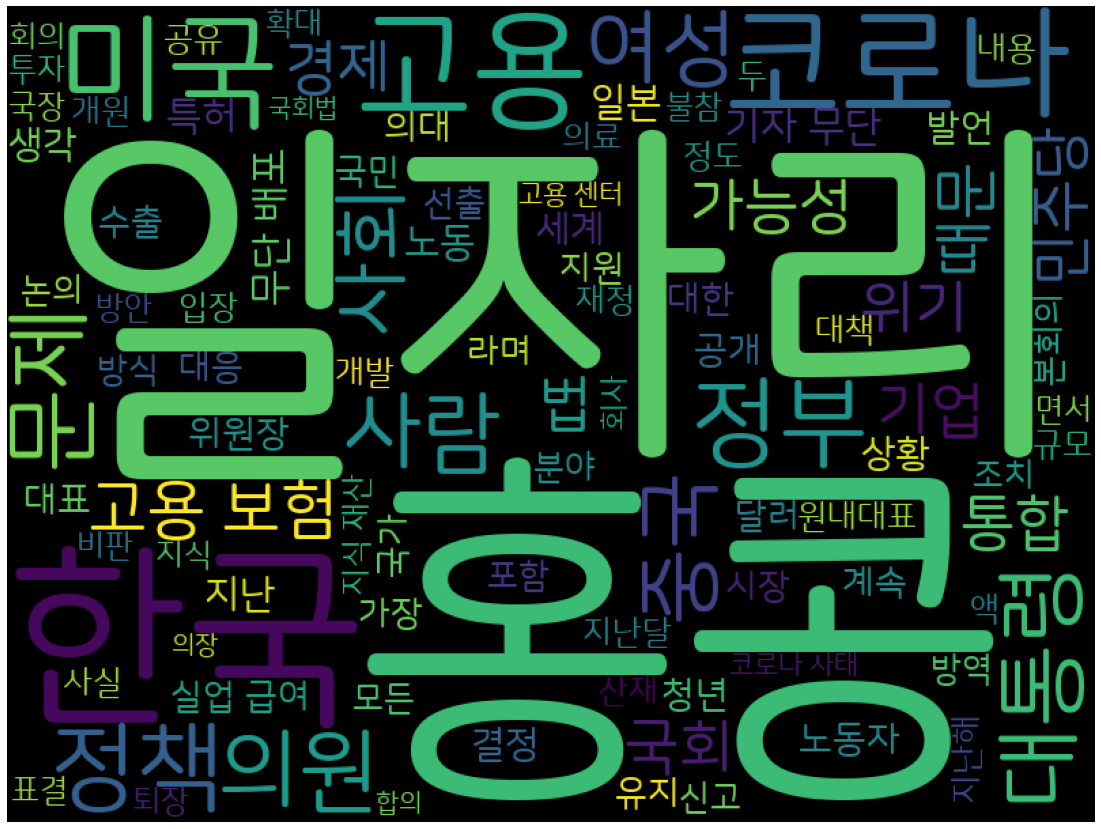

In [20]:
daily_news_text_wordcloud('2020-06-06')